In [1]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import json

try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
login_data = pd.read_json('logins.json')
print(login_data.head(10))
print(login_data.info())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
5 1970-01-01 20:21:41
6 1970-01-01 20:12:16
7 1970-01-01 20:35:47
8 1970-01-01 20:35:38
9 1970-01-01 20:47:52
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


In [3]:

login_data = login_data.sort_values(by = 'login_time')
login_data = login_data.set_index('login_time')
login_data['cnt'] = 1

print(login_data.head(10))

                     cnt
login_time              
1970-01-01 20:12:16    1
1970-01-01 20:13:18    1
1970-01-01 20:16:10    1
1970-01-01 20:16:36    1
1970-01-01 20:16:37    1
1970-01-01 20:21:41    1
1970-01-01 20:26:05    1
1970-01-01 20:26:21    1
1970-01-01 20:31:03    1
1970-01-01 20:34:46    1


In [4]:
def resample(data, rule):
    data_resample = data.resample(rule).count()
    data_resample.plot(figsize = (20, 8), title = 'Number of Login Counts based on ' + rule + ' Time Intervals')
    print(data_resample.head())
    print(data_resample.tail())

                     cnt
login_time              
1970-01-01 20:00:00   24
1970-01-01 21:00:00    9
1970-01-01 22:00:00   21
1970-01-01 23:00:00   58
1970-01-02 00:00:00   53
                     cnt
login_time              
1970-04-13 14:00:00   32
1970-04-13 15:00:00   19
1970-04-13 16:00:00   22
1970-04-13 17:00:00   22
1970-04-13 18:00:00   20


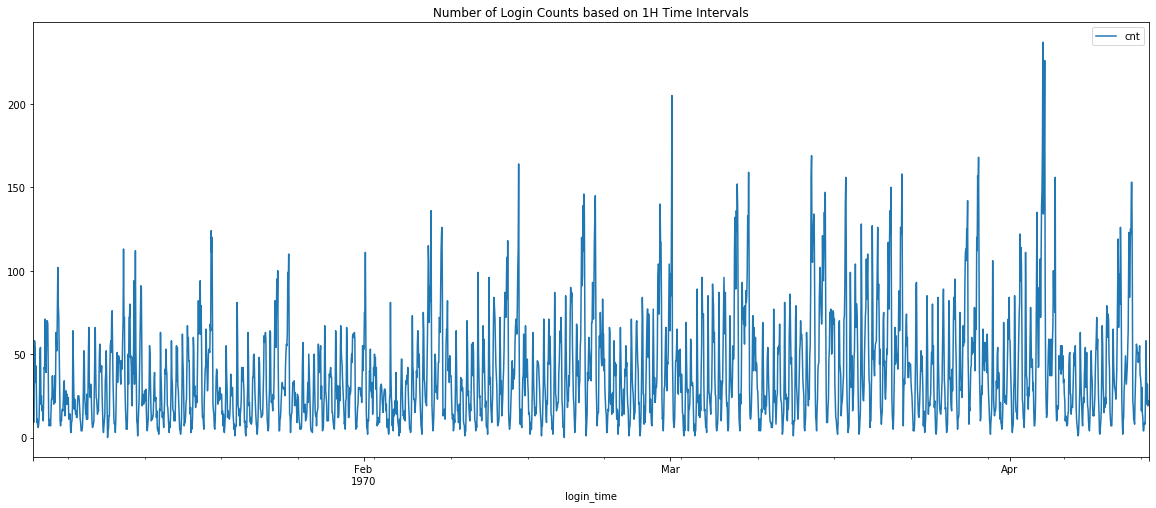

In [7]:
resample(login_data, '1H')